In [27]:
from bs4 import BeautifulSoup
import requests  
import re
import pandas as pd
import numpy as np

# Parsing

In [46]:
#  class for parsing information from https://metarankings.ru/ and saving into csv file
class Games():
#  initialize list of game links and list of result dictionaries 
    def __init__(self):
        self.game_links = []
        self.result = []

#  collect list of game links
    def get_game_links(self,n):
        url = f'https://metarankings.ru/best-games/page/'
        for i in range(1,n+1):  # pages 
            print(f'parsing page -{i}')
            url_i = url + str(i)
            response = requests.get(url_i)
            response.encoding ='utf8'
            page = BeautifulSoup(response.text, 'html.parser')
            links = page.find_all('a', class_='name')
            for link in links:
                self.game_links.append(link.get("href"))
# collect info about game 
    def get_game_info(self):
        for url in self.game_links:
            print(f'parsing url -{url}')
            response = requests.get(url)    
            response.encoding ='utf8' 
            page = BeautifulSoup(response.text, 'html.parser')
            game = {}
            try:
                game['name'] = url.split('/')[-2]
                game['score'] = page.find('div', class_='score').text
                game['num_of_voute'] = page.find('div', class_='rating').find('span').text
                featuers = page.find('div', class_= 'featured-game').find_all('p')
                for i in range(len(featuers)):
                    game[featuers[i].find('span').text] = featuers[i].text
                self.result.append(game)
            except:
                pass
#  saving into csv
    def save_info(self,file_name):
        df =  pd.DataFrame(self.result)
        df.to_csv(f'{file_name}.csv', index=False)
            

In [47]:
# creating instance of Games
g = Games()
g.get_game_links(18)
g.get_game_info()
g.save_info('df')

parsing page -1
parsing page -2
parsing page -3
parsing page -4
parsing page -5
parsing page -6
parsing page -7
parsing page -8
parsing page -9
parsing page -10
parsing page -11
parsing page -12
parsing page -13
parsing page -14
parsing page -15
parsing page -16
parsing page -17
parsing page -18
parsing url -https://metarankings.ru/reviews/the-last-of-us-remastered/
parsing url -https://metarankings.ru/reviews/uncharted-4-a-thiefs-end/
parsing url -https://metarankings.ru/reviews/the-last-of-us/
parsing url -https://metarankings.ru/reviews/the-witcher-3-wild-hunt/
parsing url -https://metarankings.ru/reviews/god-of-war-ps4/
parsing url -https://metarankings.ru/reviews/grand-theft-auto-v-obnovlennaya-versiya/
parsing url -https://metarankings.ru/reviews/red-dead-redemption-2/
parsing url -https://metarankings.ru/reviews/grand-theft-auto-v/
parsing url -https://metarankings.ru/reviews/red-dead-redemption/
parsing url -https://metarankings.ru/reviews/the-legend-of-zelda-wii-u/
parsing url

In [79]:
# reading DataFrame from csv
df = pd.read_csv('df.csv')


In [80]:
#information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          889 non-null    object 
 1   score         889 non-null    float64
 2   num_of_voute  889 non-null    object 
 3   Разработчик:  889 non-null    object 
 4   Издатель:     889 non-null    object 
 5   Платформы:    889 non-null    object 
 6   Жанр:         889 non-null    object 
 7   Локализация:  889 non-null    object 
 8   Дата выхода:  889 non-null    object 
dtypes: float64(1), object(8)
memory usage: 62.6+ KB


In [81]:
# reaname columns
df = df.rename(columns={'Разработчик:':'developer', 'Издатель:':'publisher','Платформы:':'platforms','Жанр:':'genre','Локализация:':'local',	'Дата выхода:':'publish_time'})

In [82]:
# get year
def get_year(x):
    try:
        return int(x.strip()[-5:])
    except:
        return 0

In [83]:
# data cleaning
df.developer = df.developer.apply(lambda x: x.strip()[12:])
df.publisher = df.publisher.apply(lambda x: x.strip()[10:])
df.platforms = df.platforms.apply(lambda x: x.strip()[11:])
df.genre = df.genre.apply(lambda x: x.strip()[6:])
df.local = df.local.apply(lambda x: x.strip()[13:])
df.publish_time = df.publish_time.apply(get_year)
df.num_of_voute = df.num_of_voute.apply(lambda x: int(x.replace(' ','')))

# Visualiaztion

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df.head()

,name,score,num_of_voute,developer,publisher,platforms,genre,local,publish_time
0,the-last-of-us-remastered,8.9,1884,Naughty Dog,Sony Computer Entertainment,PS4,Приключение / Хоррор / Экшен,Полностью на русском,2014
1,uncharted-4-a-thiefs-end,8.8,1796,Naughty Dog,Sony Computer Entertainment,PS4,Приключение / Экшен,Полностью на русском,2016
2,the-last-of-us,9.1,1275,The Last of Us,Sony Computer Entertainment,PS3,Хоррор / Экшен,Полностью на русском,2013
3,the-witcher-3-wild-hunt,8.9,2814,The Witcher 3: Wild Hunt,Namco Bandai Games,PC / PS4 / Switch / Xbox One,РПГ,Полностью на русском,2015
4,god-of-war-ps4,9.0,1749,Sony Santa Monica,Sony Computer Entertainment,PS4,Приключение / Экшен,Полностью на русском,2018


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          889 non-null    object 
 1   score         889 non-null    float64
 2   num_of_voute  889 non-null    int64  
 3   developer     889 non-null    object 
 4   publisher     889 non-null    object 
 5   platforms     889 non-null    object 
 6   genre         889 non-null    object 
 7   local         889 non-null    object 
 8   publish_time  889 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 62.6+ KB


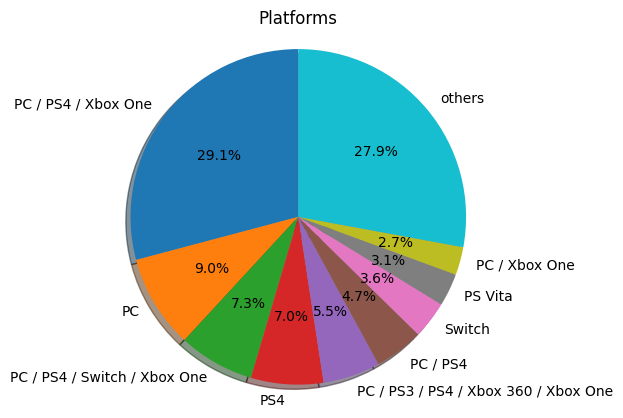

In [176]:
labels = list(df.platforms.value_counts()[:9].index)
sizes = list(df.platforms.value_counts()[:9].values)
labels.append('others')
sizes.append(sum(df.platforms.value_counts()[9:].values))
fig1, ax1 = plt.subplots()
plt.title('Platforms')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

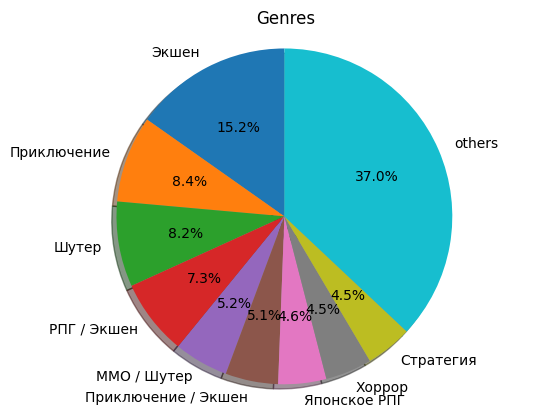

In [175]:
labels = list(df.genre.value_counts()[:9].index)
sizes = list(df.genre.value_counts()[:9].values)
labels.append('others')
sizes.append(sum(df.platforms.value_counts()[9:].values))
fig1, ax1 = plt.subplots()
plt.title('Genres')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

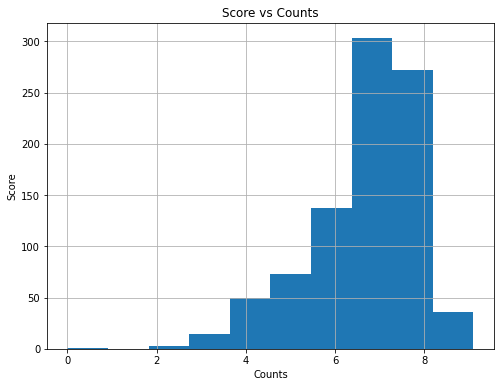

In [111]:
plt.figure(figsize=(8, 6))
plt.xlabel("Counts")
plt.ylabel("Score")
plt.title('Score vs Counts')
df.score.hist()

Text(0.5, 1.0, 'Score vs Number of voutes')

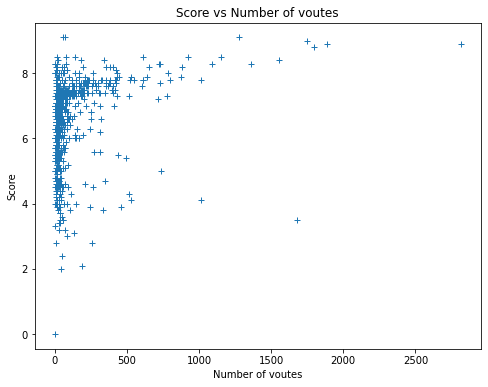

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(df.num_of_voute, df.score, '+')
plt.xlabel("Number of voutes")
plt.ylabel("Score")
plt.title('Score vs Number of voutes')

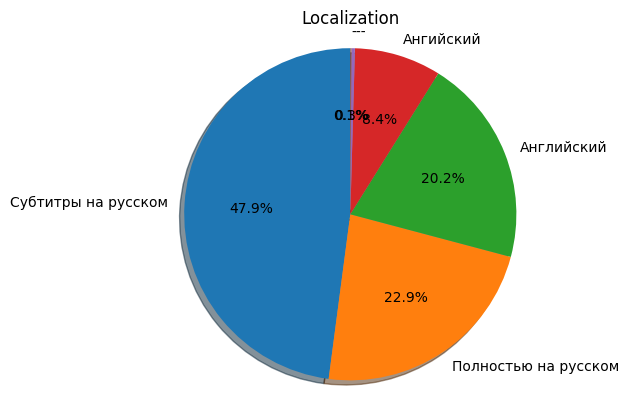

In [177]:
labels = df.local.value_counts().index
sizes = df.local.value_counts().values

fig1, ax1 = plt.subplots()
plt.title('Localization')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

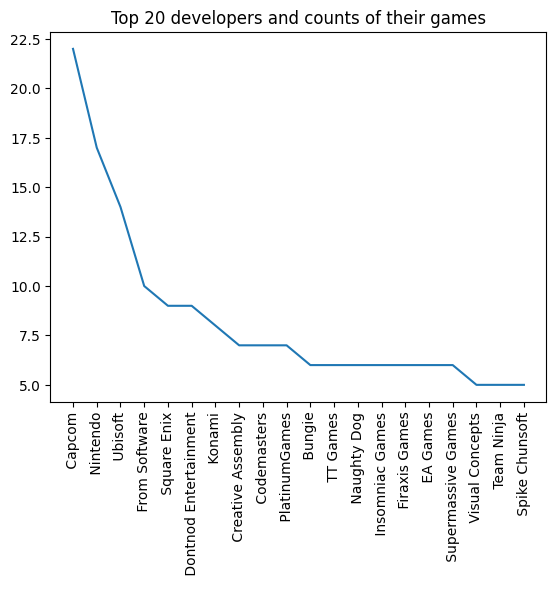

In [156]:
df1 = df.developer.value_counts().head(20)
plt.rcdefaults()
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plt.title('Top 20 developers and counts of their games')
ax.plot(df1.index,df1.values)

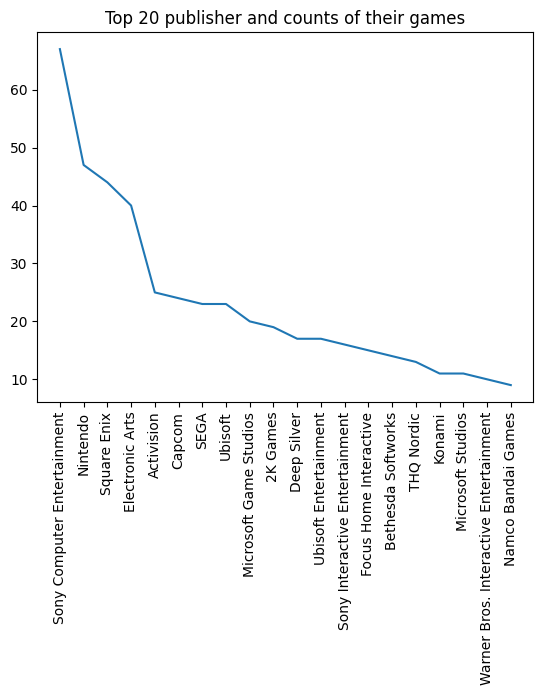

In [157]:
df1 = df.publisher.value_counts().head(20)
plt.rcdefaults()
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plt.title('Top 20 publisher and counts of their games')
ax.plot(df1.index,df1.values)